<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/Polynomial_Regression_Regresi_Polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
#   Membuat Data Non-Linear ---
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(-3, 3, 100)
X = X[:, np.newaxis] # Mengubah bentuk X agar sesuai

In [3]:
#   Latih Model Linear Sederhana ---
linear_model = LinearRegression()
linear_model.fit(X, y)
y_linear_pred = linear_model.predict(X)

In [4]:
#   Latih Model Polinomial ---
# Buat fitur polinomial (derajat 3)
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

LinearRegression()

In [5]:
# Siapkan data untuk plot garis
X_plot = np.linspace(min(X), max(X), 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_poly_plot = poly_model.predict(X_plot_poly)

In [6]:
#   Cetak Hasil & Evaluasi ---
mse_linear = mean_squared_error(y, y_linear_pred)
mse_poly = mean_squared_error(y, poly_model.predict(X_poly))
print(f"MSE Model Linear Sederhana: {mse_linear:.2f}")
print(f"MSE Model Polinomial (Derajat 3): {mse_poly:.2f}")

MSE Model Linear Sederhana: 671.59
MSE Model Polinomial (Derajat 3): 9.44


In [7]:
#   Tampilkan Visualisasi ---
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

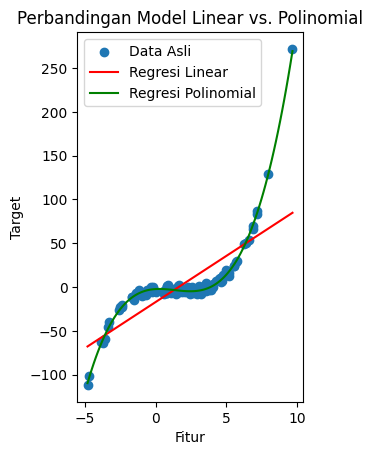

In [8]:
# Visual 1: Perbandingan Model
plt.subplot(1, 2, 1)
plt.scatter(X, y, label='Data Asli')
plt.plot(X_plot, linear_model.predict(X_plot), color='red', label='Regresi Linear')
plt.plot(X_plot, y_poly_plot, color='green', label='Regresi Polinomial')
plt.title('Perbandingan Model Linear vs. Polinomial')
plt.xlabel('Fitur')
plt.ylabel('Target')
plt.legend()

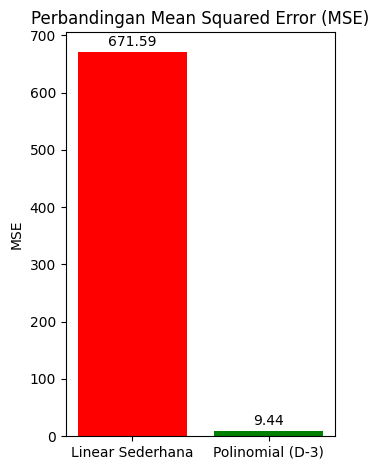

In [9]:
# Visual 2: Bagan Perbandingan Error (MSE)
plt.subplot(1, 2, 2)
models = ['Linear Sederhana', 'Polinomial (D-3)']
mses = [mse_linear, mse_poly]
plt.bar(models, mses, color=['red', 'green'])
plt.title('Perbandingan Mean Squared Error (MSE)')
plt.ylabel('MSE')
for i, v in enumerate(mses):
    plt.text(i, v + 10, f"{v:.2f}", ha='center') # Tampilkan nilai di atas bar

plt.tight_layout()
plt.show()